In [76]:
%pylab inline
from PIL import Image
import numpy as np
from skimage import data
from skimage.feature import match_template

ImagenTotal = numpy.asarray(Image.open('Rst/SectionBLarge.png'))
#multiplesizes: small, medium, large or extra
ImagenTemplateSmall = numpy.asarray(Image.open('Rst/SSC/A.png'))
ImagenTemplateMedium = numpy.asarray(Image.open('Rst/SSC/B.png'))
ImagenTemplateLarge = numpy.asarray(Image.open('Rst/SSC/C.png'))
ImagenTemplateExtra = numpy.asarray(Image.open('Rst/SSC/D.png'))

Populating the interactive namespace from numpy and matplotlib


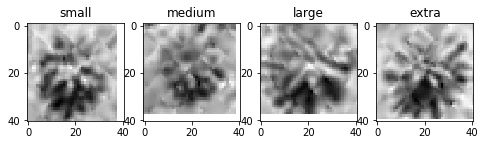

In [77]:
#notice that we work with one band
imagen = ImagenTotal[:,:,1]
arbolsmall = ImagenTemplateSmall[:,:,1]
arbolmedium = ImagenTemplateMedium[:,:,1]
arbollarge = ImagenTemplateLarge[:,:,1]
arbolextra = ImagenTemplateExtra[:,:,1]
#print(arbol)
fig = plt.figure(figsize=(8, 1.8))
ax1 = plt.subplot(1, 4, 1)
ax2 = plt.subplot(1, 4, 2,sharex=ax1,sharey=ax1)
ax3 = plt.subplot(1, 4, 3,sharex=ax1,sharey=ax1)
ax4 = plt.subplot(1, 4, 4,sharex=ax1,sharey=ax1)

ax1.imshow(arbolsmall, cmap=plt.cm.gray)
ax1.set_title('small')

ax2.imshow(arbolmedium, cmap=plt.cm.gray)
ax2.set_title('medium')

ax3.imshow(arbollarge, cmap=plt.cm.gray)
ax3.set_title('large')

ax4.imshow(arbolextra, cmap=plt.cm.gray)
ax4.set_title('extra')

In [78]:
#creating results for every tree type
sense = 0.30
#small
resultsmall = match_template(imagen, arbolsmall)
resultsmallquery = np.where(resultsmall>sense)
#medium
resultmedium = match_template(imagen, arbolmedium)
resultmediumquery = np.where(resultmedium>sense)
#large
resultlarge = match_template(imagen, arbollarge)
resultlargequery = np.where(resultlarge>sense)
#extra
resultextra = match_template(imagen, arbolextra)
resultextraquery = np.where(resultextra>sense)



In [79]:
def listapuntos(result):
    xlist = []
    ylist = []
    for punto in range(shape(result)[1]):
        xlist.append(result[1][punto])
        ylist.append(result[0][punto])
    return xlist, ylist

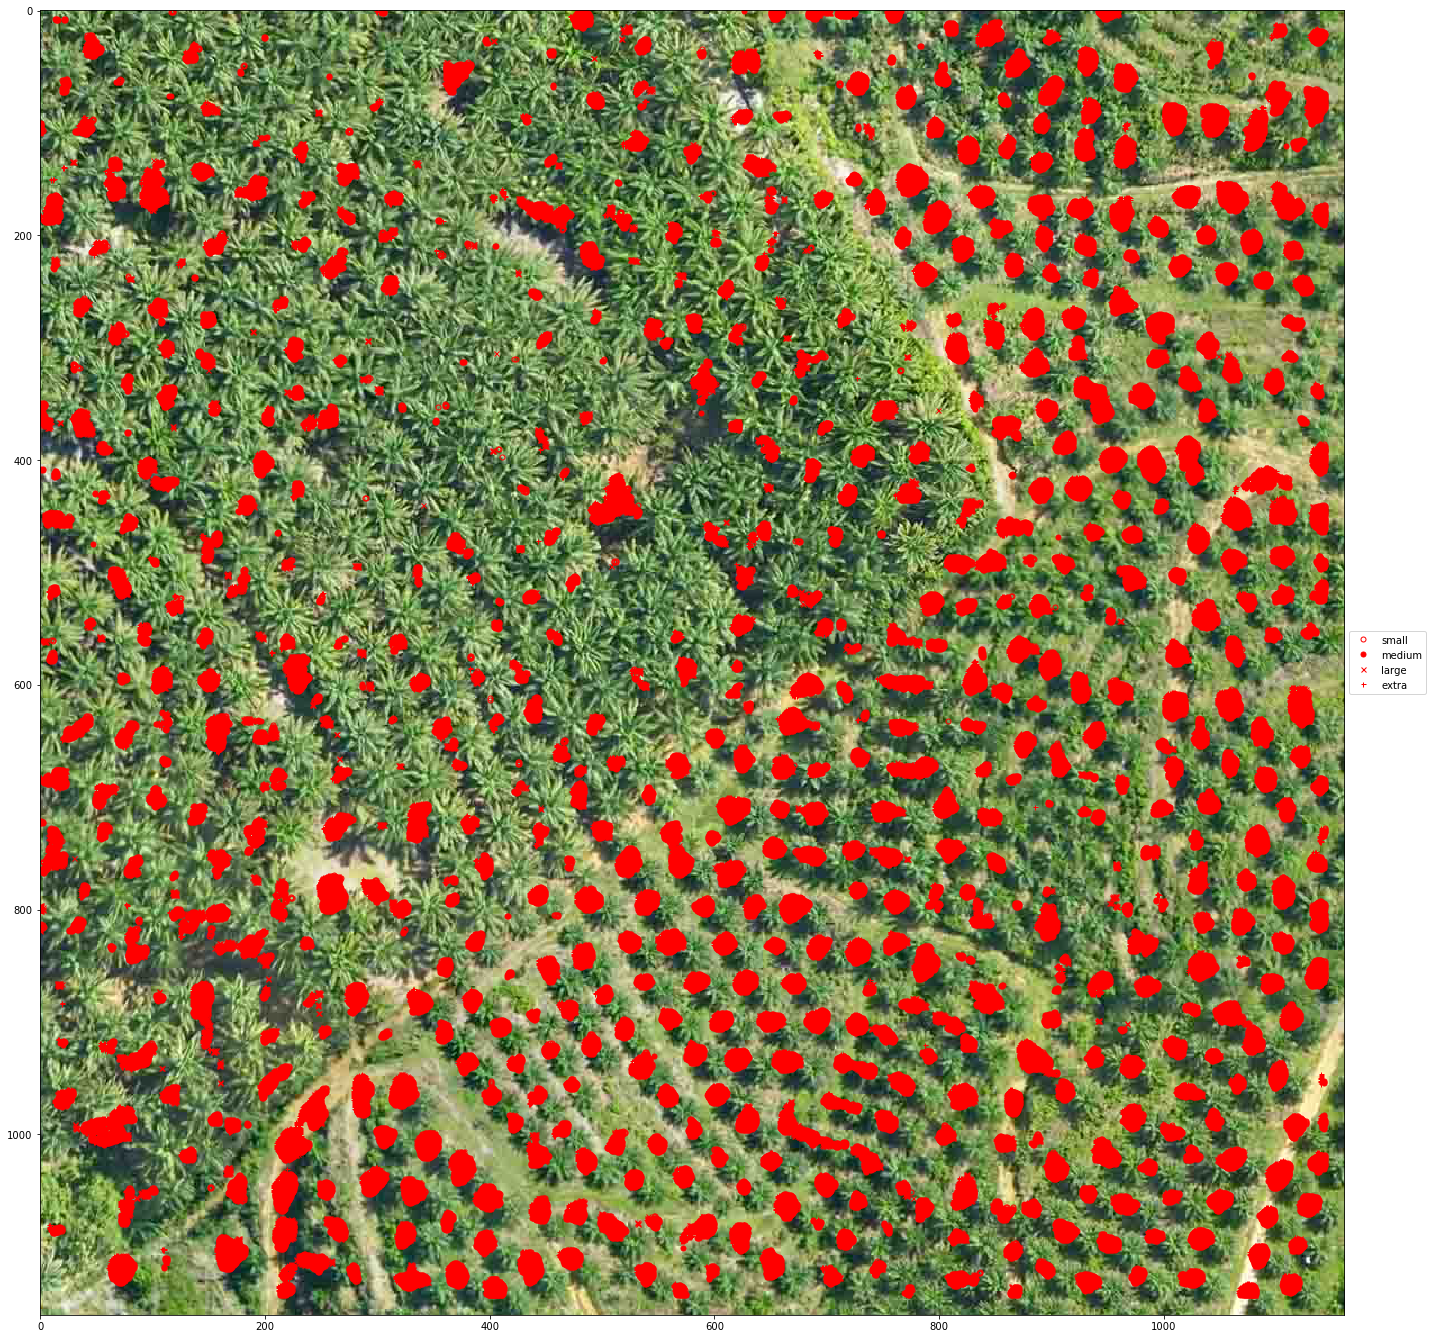

In [81]:
#show the interpreted results 
#small
plot(listapuntos(resultsmallquery)[0], listapuntos(resultsmallquery)[1], 'o', 
         markeredgecolor='r', markerfacecolor='none', markersize=5, label="small")
#medium
plot(listapuntos(resultmediumquery)[0], listapuntos(resultmediumquery)[1], 'o', 
         markeredgecolor='r', markerfacecolor='r', markersize=5, label="medium")
#large
plot(listapuntos(resultlargequery)[0], listapuntos(resultlargequery)[1], 'x', 
         markeredgecolor='r', markerfacecolor='none', markersize=5, label="large")
#extra
plot(listapuntos(resultextraquery)[0], listapuntos(resultextraquery)[1], '+', 
         markeredgecolor='r', markerfacecolor='none', markersize=5, label="extra")
imshow(ImagenTotal[10:-10,10:-10,:])
legend(loc='center left', bbox_to_anchor=(1, 0.5))
#figure(figsize=(12,12));
figsize(24,24)
savefig("AIMAN.PNG")

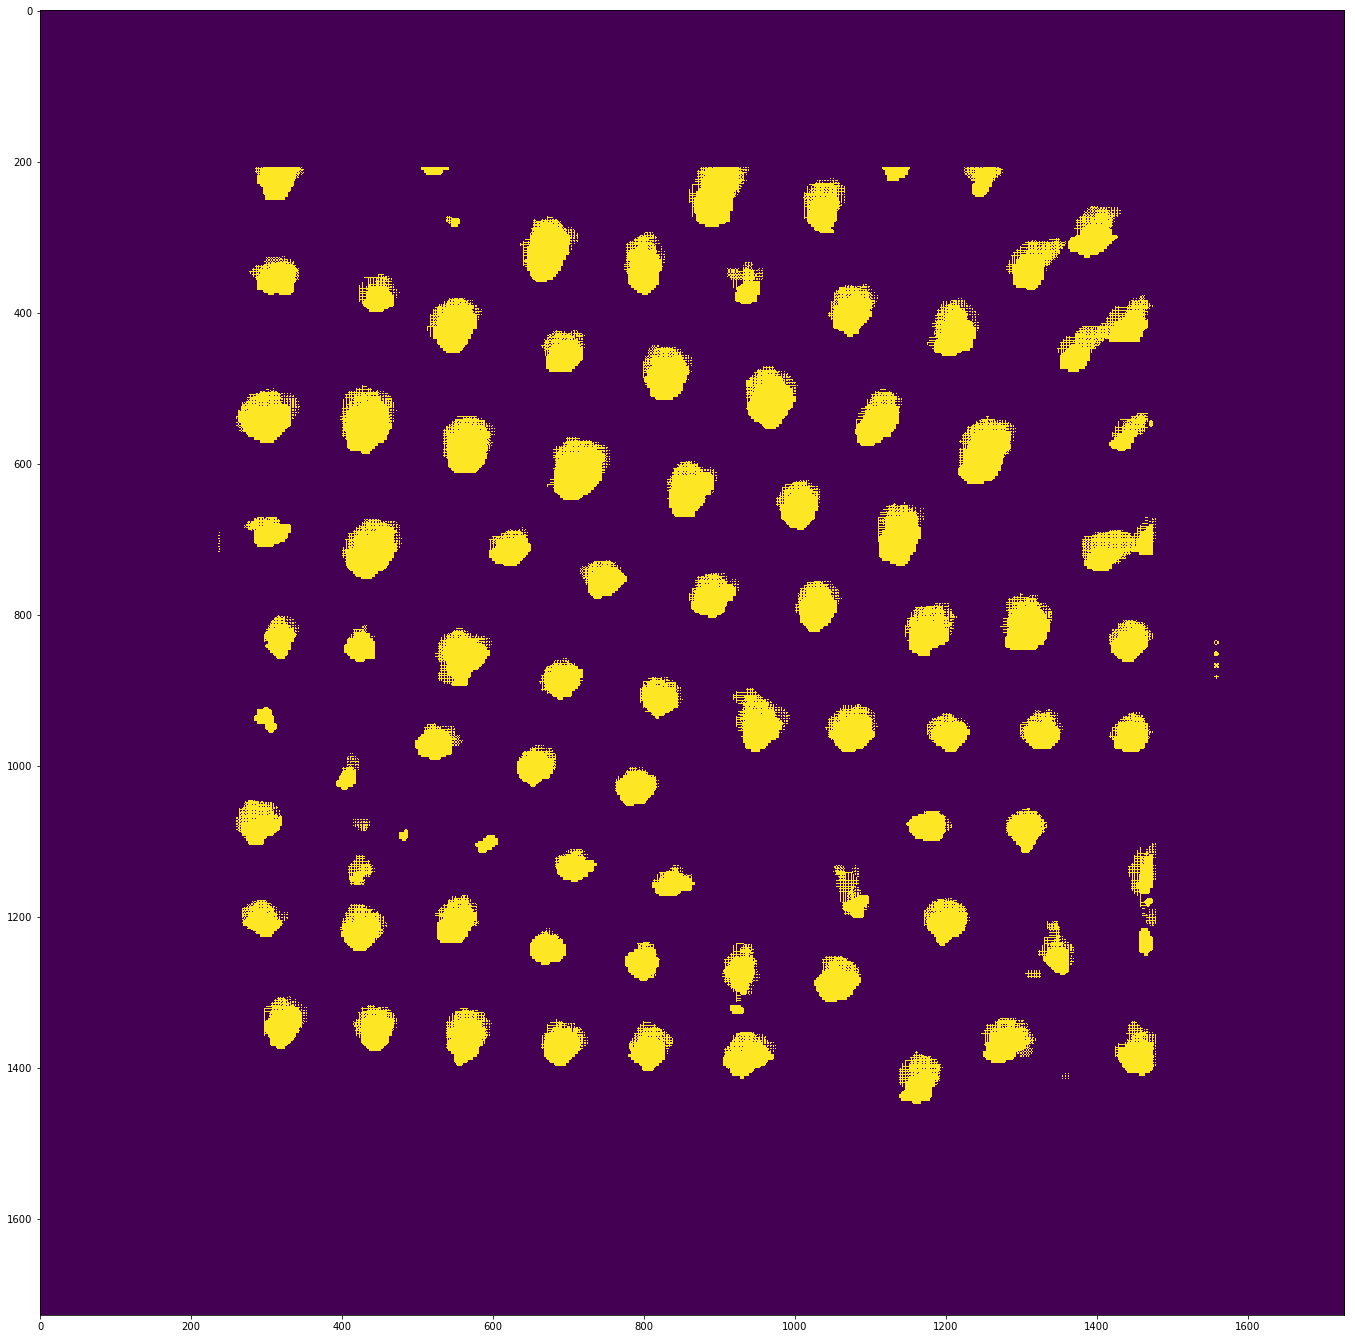

In [66]:
import cv2

image = cv2.imread("AIMAN.PNG")

ORANGE_MIN = np.array([0, 15, 100],np.uint8)
ORANGE_MAX = np.array([1, 255, 255],np.uint8)

hsv_img = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)

frame_threshed = cv2.inRange(hsv_img, ORANGE_MIN, ORANGE_MAX)

kernel = np.ones((1,1),np.uint8)
morphed = cv2.morphologyEx(frame_threshed,cv2.MORPH_OPEN, kernel)


cv2.imwrite('output2.jpg', morphed)
imshow(morphed)



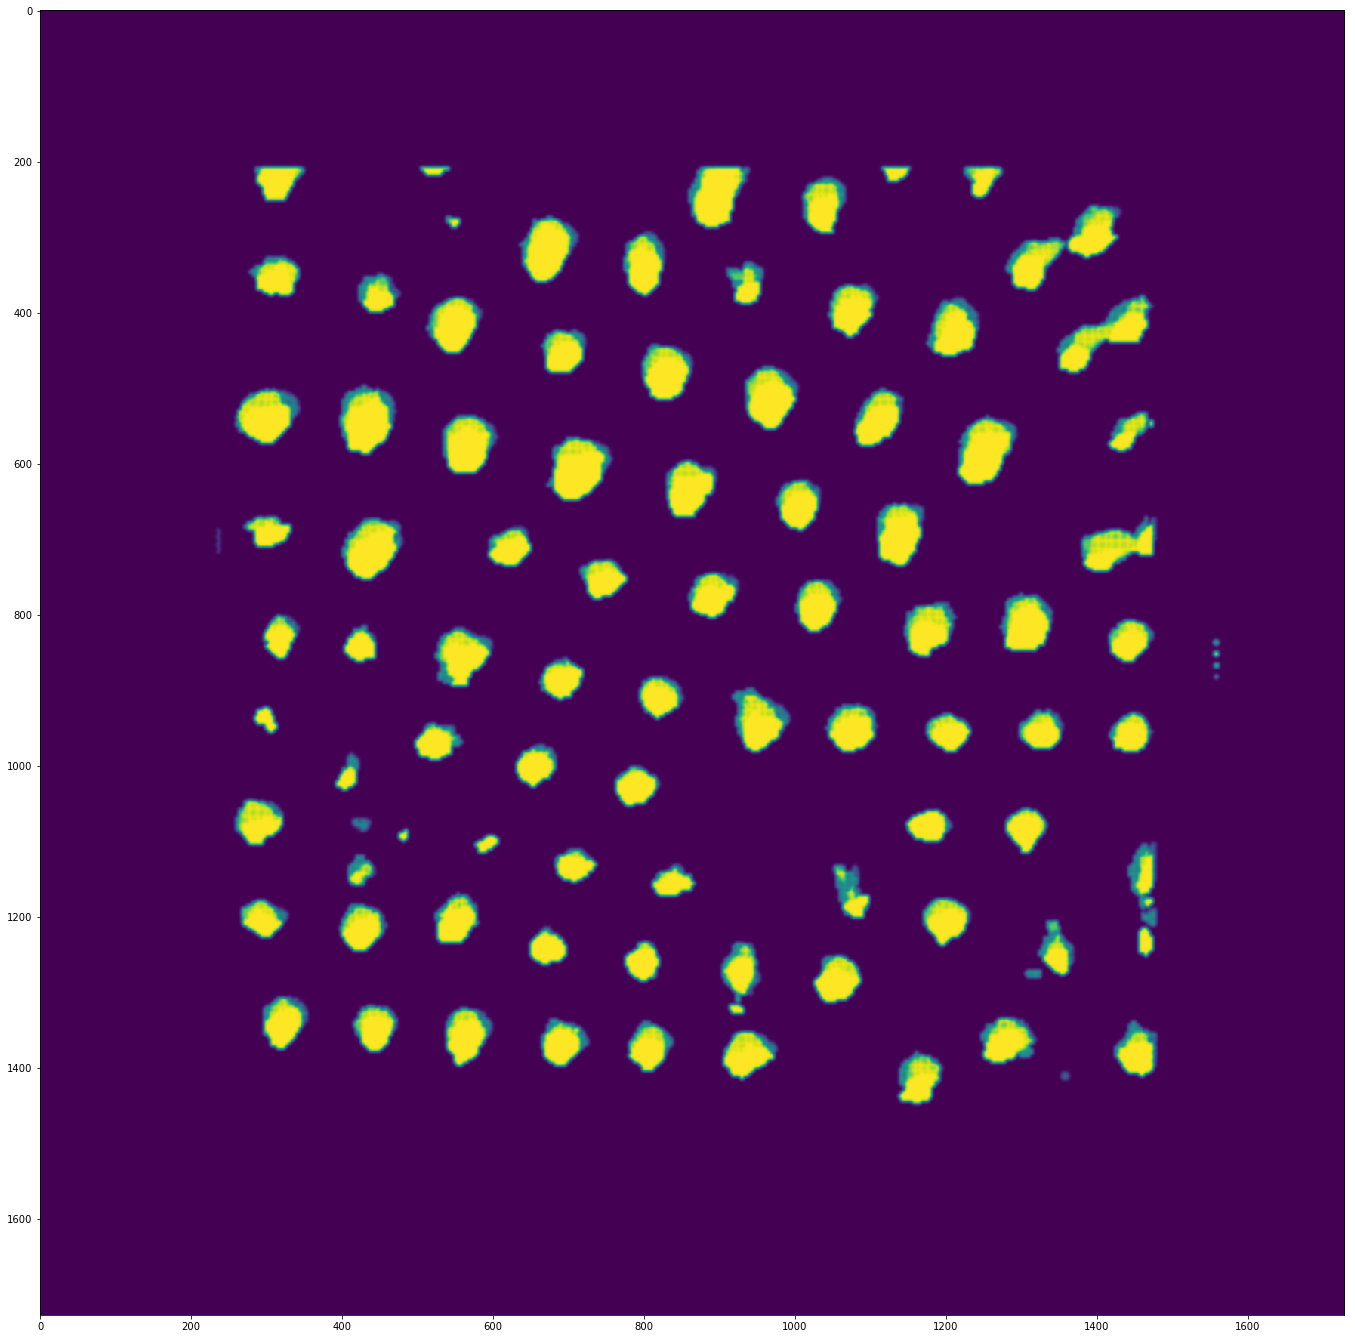

In [67]:

image = cv2.imread("output2.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (11, 11), 0)
imshow(blurred)
#blurred = gray

In [68]:

thresh = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)[1]

In [69]:

thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=4)

In [70]:
from imutils import contours
from skimage import measure
import numpy as np
import argparse
import imutils
import cv2

labels = measure.label(thresh, neighbors=8, background=0)
mask = np.zeros(thresh.shape, dtype="uint8")

for label in np.unique(labels):

    if label == 0:
        continue
 
    # otherwise, construct the label mask and count the
    # number of pixels 
    labelMask = np.zeros(thresh.shape, dtype="uint8")
    labelMask[labels == label] = 255
    numPixels = cv2.countNonZero(labelMask)
 
    # if the number of pixels in the component is sufficiently
    # large, then add it to our mask of "large blobs"
    if numPixels > 30 :
        mask = cv2.add(mask, labelMask)

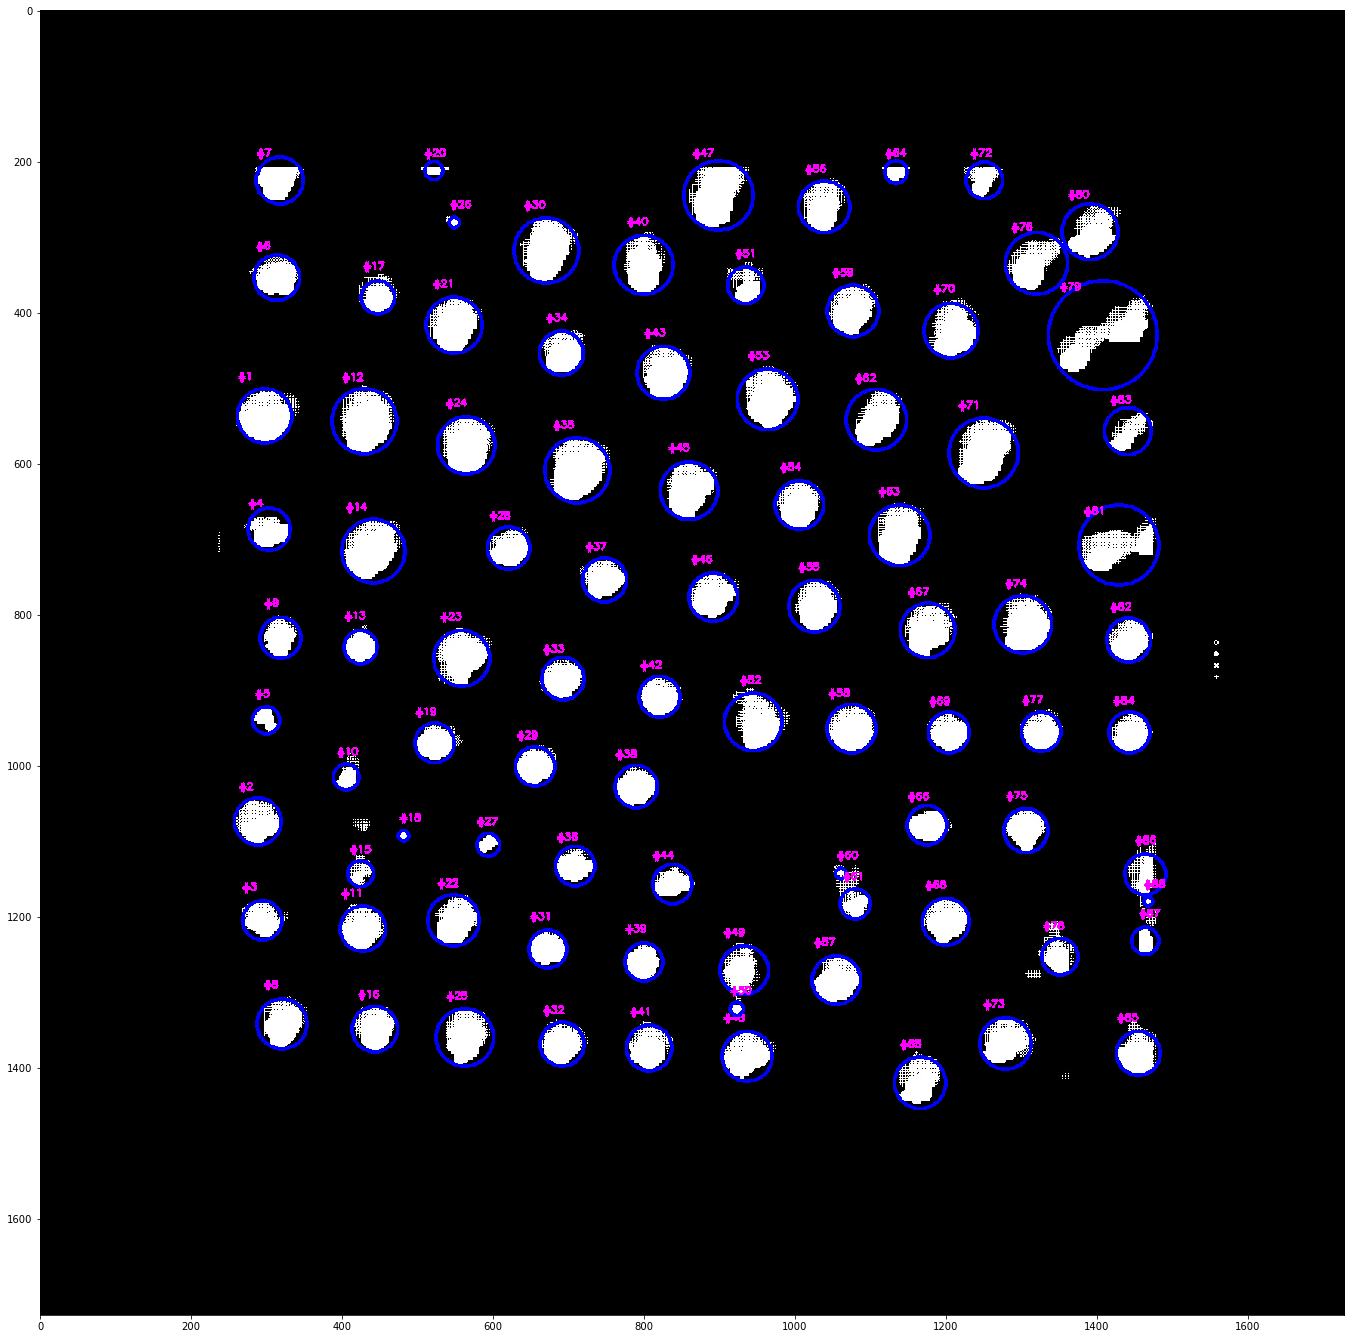

In [71]:

# find the contours in the mask, then sort them from left to
# right
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
cnts = contours.sort_contours(cnts)[0]
 
# loop over the contours
for (i, c) in enumerate(cnts):
    # draw the bright spot on the image
    (x, y, w, h) = cv2.boundingRect(c)
    ((cX, cY), radius) = cv2.minEnclosingCircle(c)
    cv2.circle(image, (int(cX), int(cY)), int(radius),
        (0, 0, 255), 3)
    cv2.putText(image, "#{}".format(i + 1), (x, y - 15),
        cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 0, 255), 2)
 
# show the output image

imshow(image,)



In [72]:
print (len(cnts))

88
